In [1]:
%matplotlib inline
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import glob 
import os
import random

In [2]:
def multi_implot(subject,depth):
    i = 1
    fig = plt.figure(figsize=(20, 20))
    for label, file_dir in subject.items():
        img = sitk.GetArrayFromImage(sitk.ReadImage(file_dir[0]))
        fig.add_subplot(1,5,i)
        plt.imshow(img[depth,:,:],interpolation='nearest')
        plt.title("mod:{}\n {}".format(label,img.shape[1:]))
        plt.xticks([])
        plt.yticks([])
        i = i + 1


## Load file names of all subjects from training 

In [6]:
folder_train = glob.glob(os.getcwd() + "/.." + "/BRATS_2015/TRAIN/*/*")

subjects = []

for idx, i in enumerate(folder_train):
    _t1 = glob.glob(i + '/*T1*.mha')
    _t2 = glob.glob(i + '/*T2*.mha')
    _t1c = glob.glob(i + '/*T1c*.mha')
    _flair = glob.glob(i + '/*Flair*.mha')
    _t1 = [_t1 for _t1 in _t1 if not _t1 in _t1c]
    _label = glob.glob(i + '/*OT*.mha')
    
    subjects.append({"t1":_t1, "t2":_t2, "t1c":_t1c,
                    "flair":_flair, "label":_label})

## Load a slice of each modalities from a random subject  

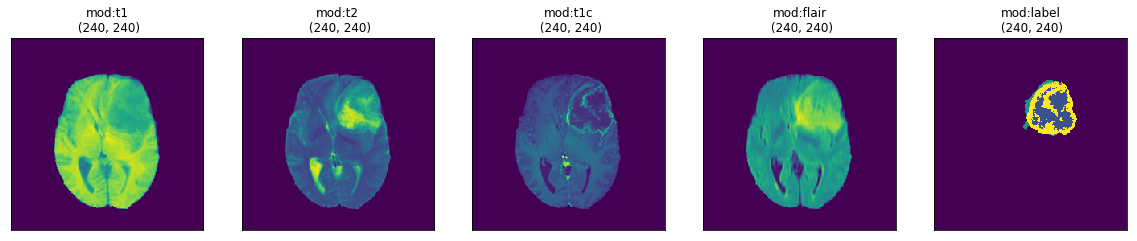

In [7]:
subject = subjects[random.randint(0,200)]
depth = random.randint(50,100)
multi_implot(subject,depth)